In [3]:
import os
import numpy as np
import tensorflow as tf
import skimage.io
from skimage.util import random_noise
from sklearn.model_selection import train_test_split
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from skimage.transform import resize
import matplotlib.pyplot as plt

In [4]:
# Specify the directory for the non-noisy images
non_noisy_directory = "/content/drive/MyDrive/ANN/images/train"

# Specify the directory for saving the noisy images
noisy_directory = "/content/drive/MyDrive/ANN/images/noisy"

In [5]:
# Specify the type and parameters of the noise
noise_type = 'gaussian'
variance = 0.01

In [6]:
# # Iterate over the files in the non-noisy directory
# for filename in os.listdir(non_noisy_directory):
#     # Check if the file name matches the desired pattern
#     if filename.endswith('.jpg'):
#         file_path_non_noisy = os.path.join(non_noisy_directory, filename)
#         # Read the non-noisy image
#         non_noisy_image = skimage.io.imread(file_path_non_noisy)
#         # Generate the noisy image
#         noisy_image = random_noise(non_noisy_image, mode=noise_type, var=variance)
#         # Save the noisy image
#         noisy_filename = 'noisy_' + filename
#         noisy_file_path = os.path.join(noisy_directory, noisy_filename)
#         skimage.io.imsave(noisy_file_path, (noisy_image * 255).astype(np.uint8))

In [7]:
# Initialize empty lists for noisy images and non-noisy images
noisy_images = []
non_noisy_images = []

In [8]:
# Iterate over the files in the noisy directory
for noisy_filename in os.listdir(noisy_directory):
    # Check if the file name matches the desired pattern
    if noisy_filename.startswith('noisy_'):
        # Extract the common identifier from the noisy file name
        common_identifier = noisy_filename.split('noisy_')[1]
        # Construct the corresponding non-noisy file name
        non_noisy_filename = common_identifier
        # Construct the file paths for the noisy and non-noisy images
        file_path_noisy = os.path.join(noisy_directory, noisy_filename)
        file_path_non_noisy = os.path.join(non_noisy_directory, non_noisy_filename)
        # Read the noisy image
        noisy_image = skimage.io.imread(file_path_noisy)
        # Read the corresponding non-noisy image
        non_noisy_image = skimage.io.imread(file_path_non_noisy)
        # Append the images to the respective lists
        noisy_images.append(noisy_image)
        non_noisy_images.append(non_noisy_image)

In [9]:
# Resize the images to the desired shape
resized_noisy_images = []
resized_non_noisy_images = []
desired_shape = (32, 32)
for noisy_image, non_noisy_image in zip(noisy_images, non_noisy_images):
    resized_noisy_image = resize(noisy_image, desired_shape, mode='reflect', anti_aliasing=True)
    resized_non_noisy_image = resize(non_noisy_image, desired_shape, mode='reflect', anti_aliasing=True)
    resized_noisy_images.append(resized_noisy_image)
    resized_non_noisy_images.append(resized_non_noisy_image)

In [10]:
# Convert the resized images to numpy arrays
noisy_images = np.array(resized_noisy_images)
non_noisy_images = np.array(resized_non_noisy_images)

In [11]:
# Normalize the pixel values to the range [0, 1]
noisy_images = noisy_images / 255.0
non_noisy_images = non_noisy_images / 255.0

In [12]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(noisy_images, non_noisy_images, test_size=0.25)

In [13]:
# Reshape the input data to include the channel dimension
X_train = np.reshape(X_train, (*X_train.shape, 1))
X_test = np.reshape(X_test, (*X_test.shape, 1))

In [14]:
y_train = np.reshape(y_train, (*y_train.shape, 1))
y_test = np.reshape(y_test, (*y_test.shape, 1))

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(32, 32, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='sigmoid')
])

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [17]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
171/171 [==============================] - 41s 226ms/step - loss: 0.0665 - val_loss: 5.6155e-05
Epoch 2/10
171/171 [==============================] - 35s 208ms/step - loss: 2.1537e-05 - val_loss: 7.2824e-06
Epoch 3/10
171/171 [==============================] - 36s 209ms/step - loss: 4.7525e-06 - val_loss: 3.3819e-06
Epoch 4/10
171/171 [==============================] - 35s 208ms/step - loss: 2.9102e-06 - val_loss: 2.6120e-06
Epoch 5/10
171/171 [==============================] - 37s 215ms/step - loss: 2.4599e-06 - val_loss: 2.3670e-06
Epoch 6/10
171/171 [==============================] - 35s 207ms/step - loss: 2.2978e-06 - val_loss: 2.2643e-06
Epoch 7/10
171/171 [==============================] - 36s 208ms/step - loss: 2.2231e-06 - val_loss: 2.2110e-06
Epoch 8/10
171/171 [==============================] - 35s 206ms/step - loss: 2.1805e-06 - val_loss: 2.1770e-06
Epoch 9/10
171/171 [==============================] - 36s 209ms/step - loss: 2.1512e-06 - val_loss: 2.1518e-06
Epoch

In [18]:
# Generate denoised images using the trained model
denoised_images = model.predict(X_test)

57/57 [==============================] - 5s 76ms/step


57/57 [==============================] - 6s 96ms/step
(1823, 32, 32, 32)
[0.0004249  0.0004249  0.00042491 ... 0.0004457  0.00044571 0.00044571]


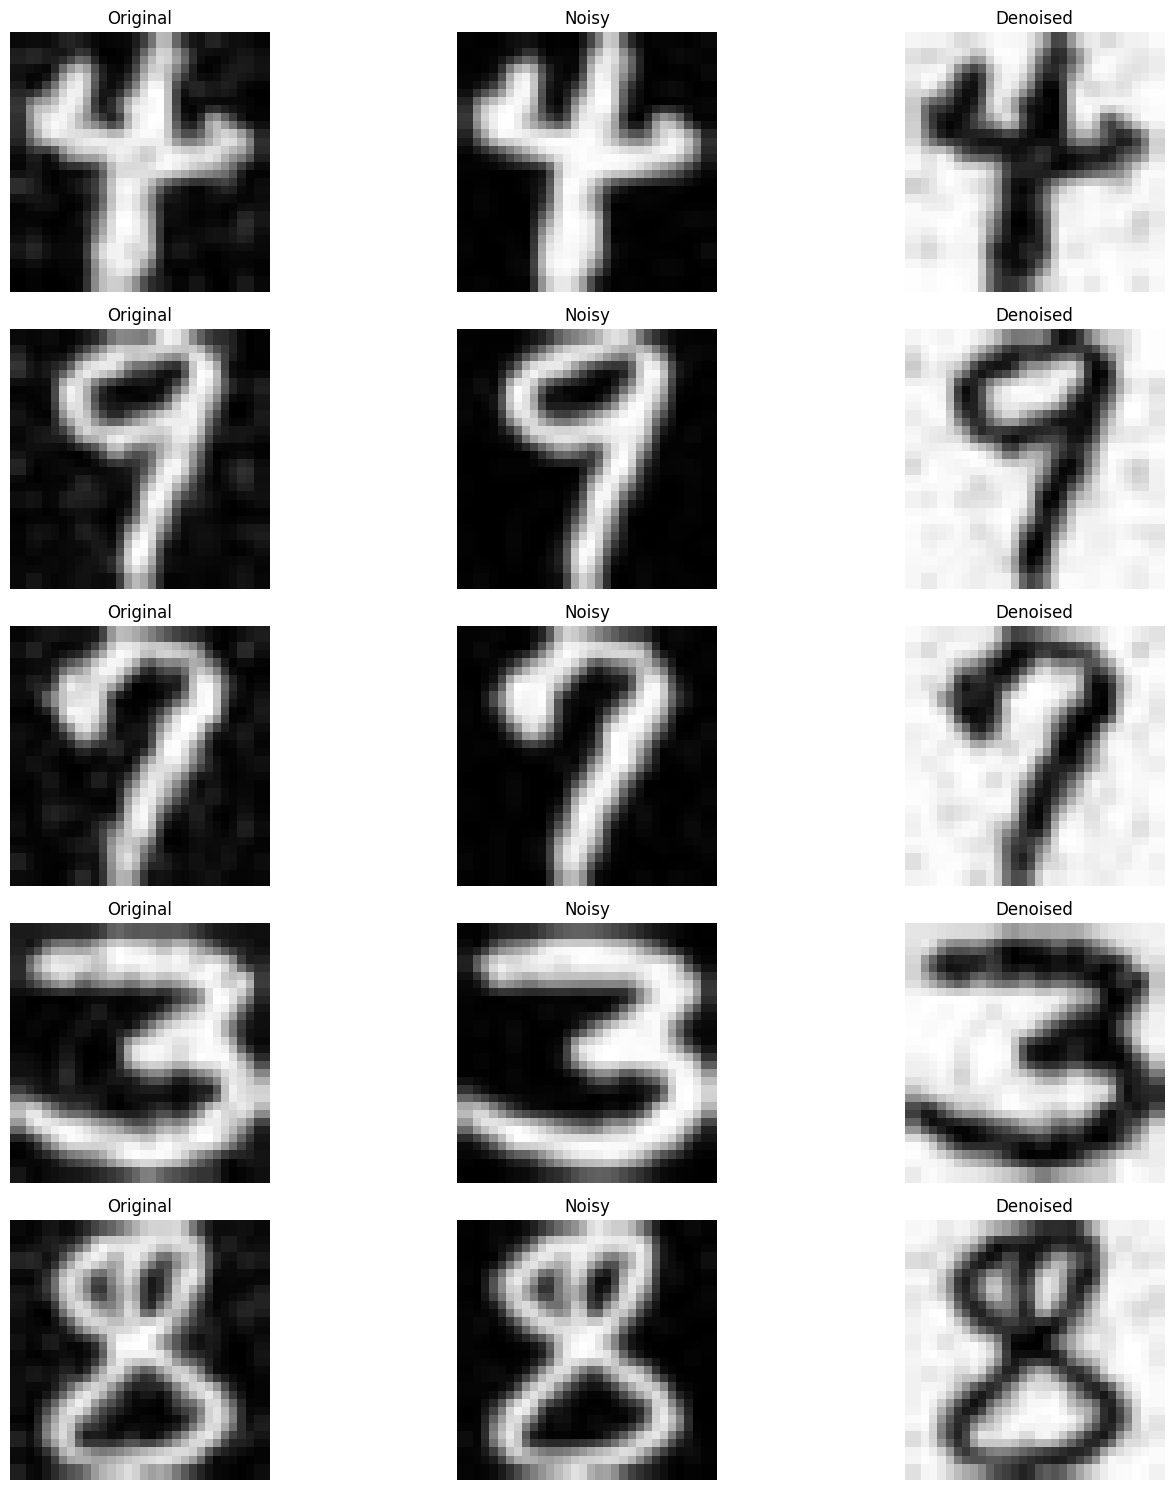

In [19]:
# Generate denoised images using the trained model
denoised_images = model.predict(X_test)

# Print the shape of the denoised images
print(denoised_images.shape)

# Print the unique values in the extra dimension
print(np.unique(denoised_images[:,:,:,0]))

# Rescale the denoised images from [-1, 1] to [0, 1]
denoised_images = (denoised_images + 1) / 2.0

# Select random indices to display images
num_images = 5
random_indices = np.random.choice(range(len(X_test)), num_images, replace=False)

# Display original images with their corresponding noisy and denoised versions
fig, axes = plt.subplots(num_images, 3, figsize=(15, 15))

for i, idx in enumerate(random_indices):
    # Original image
    axes[i, 0].imshow(X_test[idx].squeeze(), cmap='gray')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Noisy image
    axes[i, 1].imshow(y_test[idx].squeeze(), cmap='gray')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

    # Denoised image (select channel 0)
    axes[i, 2].imshow(denoised_images[idx, :, :, 0], cmap='gray')
    axes[i, 2].set_title('Denoised')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from skimage.transform import resize

# Initialize lists for resized original non-noisy images and denoised images
resized_original_images = []
resized_denoised_images = []

# Resize the original non-noisy images and denoised images to the same dimensions
desired_shape = (256, 256)  # Replace with your desired dimensions

for original_image, denoised_image in zip(y_test, denoised_images):
    resized_original_image = resize(original_image, desired_shape, mode='reflect', anti_aliasing=True)
    resized_original_images.append(resized_original_image)

    resized_denoised_image = resize(denoised_image, desired_shape, mode='reflect', anti_aliasing=True)
    resized_denoised_images.append(resized_denoised_image)

# Convert the resized images to numpy arrays
resized_original_images = np.array(resized_original_images)
resized_denoised_images = np.array(resized_denoised_images)

# Compute PSNR and SSIM for each denoised image
psnr_scores = []
ssim_scores = []

for i in range(len(resized_original_images)):
    psnr = peak_signal_noise_ratio(resized_original_images[i], resized_denoised_images[i])
    ssim = structural_similarity(resized_original_images[i], resized_denoised_images[i])
    psnr_scores.append(psnr)
    ssim_scores.append(ssim)

# Calculate the average PSNR and SSIM scores
average_psnr = np.mean(psnr_scores)
average_ssim = np.mean(ssim_scores)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)